© 2025 WaLSA Team - Shahin Jafarzadeh et al.

This notebook is part of the [WaLSAtools](https://github.com/WaLSAteam/WaLSAtools) package (v1.0.0), provided under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0).

You may use, modify, and distribute this notebook and its contents under the terms of the license.

---

**Important Note on Figures**:
Figures generated using this notebook that are **identical to or derivative of those published in**:  
**Jafarzadeh, S., Jess, D. B., Stangalini, M. et al. 2025, Nature Reviews Methods Primers, in press**,  
are copyrighted by ***Nature Reviews Methods Primers***. Any reuse of such figures requires explicit permission from the journal.

Figures that are newly created, modified, or unrelated to the published article may be used under the terms of the Apache License.

---

**Disclaimer**:
This notebook and its code are provided "as is", without warranty of any kind, express or implied. Refer to the license for more details.

In [1]:
from astropy.io import fits # type: ignore
from WaLSAtools import WaLSAtools, WaLSA_save_pdf # type: ignore

# Load FITS data
data_dir = 'Synthetic_Data/'
hdul = fits.open(data_dir + 'NRMP_signal_3D.fits')
signal_3d = hdul[0].data  # 3D synthetic data
time = hdul[1].data # Time array, saved in the second HDU (Extension HDU 1)
hdul.close()

# Computed POD modes using WaLSAtools
pod_results = WaLSAtools(
    signal=signal_3d, 
    time=time, 
    method='pod',
    spod = True
)

Starting POD analysis ....
Processing a 3D cube with shape (200, 130, 130).
Starting SPOD analysis ....
SPOD analysis completed.
POD analysis completed.
Top 10 frequencies and normalized power values:
[[0.1, 1.0], [0.15, 0.71], [0.25, 0.61], [0.2, 0.54], [0.3, 0.47], [0.5, 0.4], [0.35, 0.33], [0.4, 0.26], [0.45, 0.25], [0.55, 0.19]]
Total variance contribution of the first 200 modes: 100.00%

---- POD/SPOD Results Summary ----

input_data (ndarray, Shape: (200, 130, 130)): Original input data, mean subtracted (Shape: (Nt, Ny, Nx))
spatial_mode (ndarray, Shape: (200, 130, 130)): Reshaped spatial modes matching the dimensions of the input data (Shape: (Nmodes, Ny, Nx))
temporal_coefficient (ndarray, Shape: (200, 200)): Temporal coefficients associated with each spatial mode (Shape: (Nmodes, Nt))
eigenvalue (ndarray, Shape: (200,)): Eigenvalues corresponding to singular values squared (Shape: (Nmodes))
eigenvalue_contribution (ndarray, Shape: (200,)): Eigenvalue contribution of each mode 

In [2]:
SPOD_spatial_modes = pod_results['SPOD_spatial_modes']
SPOD_temporal_coefficients = pod_results['SPOD_temporal_coefficients']

GPL Ghostscript 10.04.0 (2024-09-18)
Copyright (C) 2024 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1
PDF saved in CMYK format as 'Figures/FIGS8_SPOD.pdf'


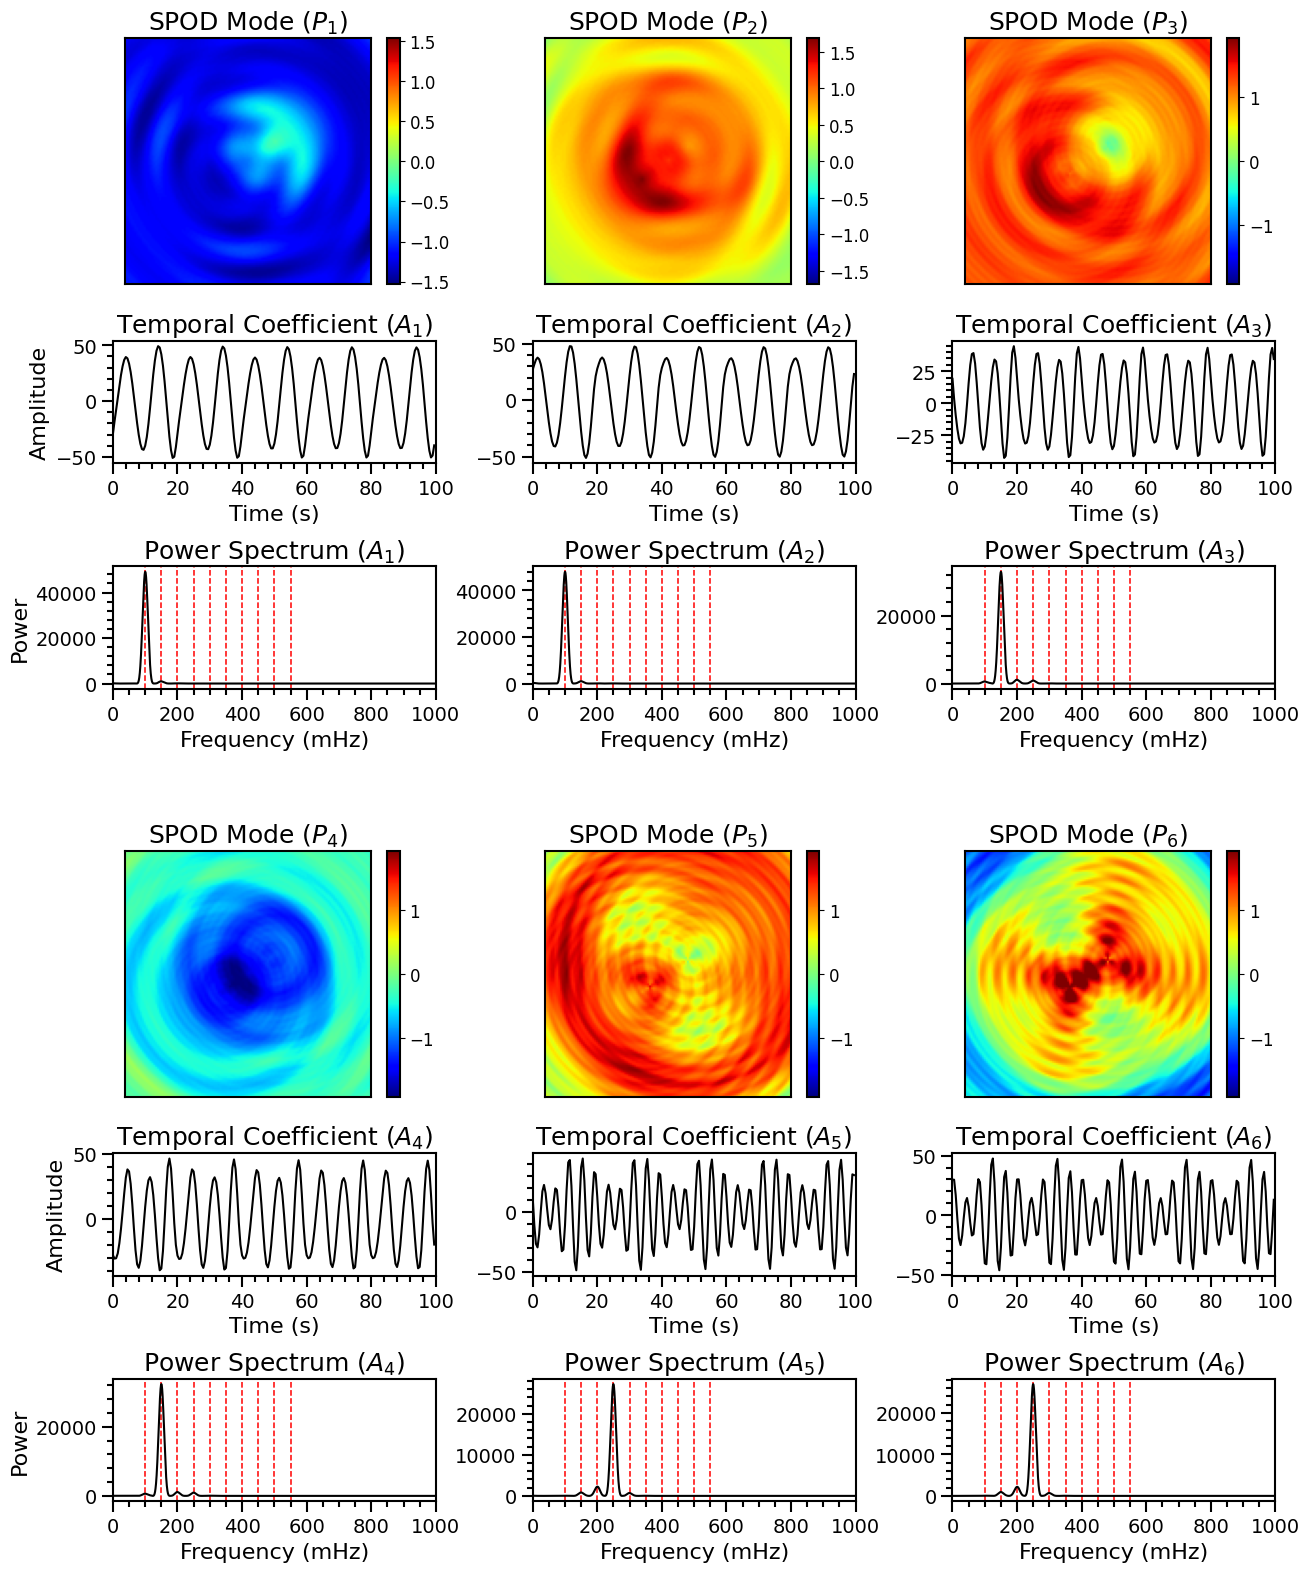

In [3]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.gridspec as gridspec # type: ignore
from matplotlib.ticker import AutoMinorLocator # type: ignore
from scipy.signal import welch # type: ignore

# Setting global parameters for plot appearance
plt.rcParams.update({
    'font.size': 14,          # Global font size
    'axes.titlesize': 18,     # Title font size
    'axes.labelsize': 16,     # Axis label font size
    'xtick.labelsize': 12,    # X-axis tick label font size
    'ytick.labelsize': 12,    # Y-axis tick label font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 20,   # Figure title font size
    'axes.grid': False,        # Turn on grid by default
    'grid.alpha': 0.5,        # Grid transparency
    'grid.linestyle': '--',   # Grid line style
})

mode_shift = 0  # Offset for mode indices

# Create a figure with specific dimensions
fig = plt.figure(figsize=(15, 19))

# Create a grid layout for subplots
gs1 = gridspec.GridSpec(9, 3, height_ratios=[1, 0.5, -0.04, 0.5, 0.2, 1, 0.5, -0.04, 0.5], figure=fig, hspace=0.5, wspace=0.3)

# Loop to plot the first set of 3 modes
for m in range(3): 
    # Plot SPOD spatial mode as an image
    ax_img = plt.subplot(gs1[0, m])
    ax_img.set_title(f'SPOD Mode ($P_{m+1+mode_shift}$)')
    vmax = (np.abs(SPOD_spatial_modes[m+mode_shift,:,:]).max())
    img = ax_img.imshow(np.flipud(SPOD_spatial_modes[m+mode_shift,:,:]), cmap='jet',vmax=vmax,vmin=-vmax)
    colorbar = plt.colorbar(img, ax=ax_img, orientation='vertical', shrink=1.0)
    colorbar.outline.set_linewidth(1.5)
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    for spine in ax_img.spines.values():
        spine.set_linewidth(1.5)

    # Plot temporal coefficients
    ax_line = plt.subplot(gs1[1, m])
    ax_line.plot(time, SPOD_temporal_coefficients[:,m+mode_shift], 'k')
    ax_line.set_title(f'Temporal Coefficient ($A_{m+1+mode_shift}$)')
    ax_line.set_xlabel('Time (s)')  # X label
    if m == 0:
        ax_line.set_ylabel('Amplitude')  # Y label
    ax_line.grid(False)  # Add grid
    ax_line.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_line.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_line.tick_params(axis='both', labelsize=14)
    for spine in ax_line.spines.values():
        spine.set_linewidth(1.5)
    ax_line.set_xlim(0,100)

    # Plot power spectrum of the temporal coefficients - using Welch's method
    ax_welch = plt.subplot(gs1[3, m])
    # Mark pre-defined frequencies with vertical lines
    pre_defined_freq = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
    for freq in pre_defined_freq:
        rounded_freq = freq
        ax_welch.axvline(x=freq, color='r', linestyle='--', linewidth=1.1)
    f, px = welch(SPOD_temporal_coefficients[:,m+mode_shift] - np.mean(SPOD_temporal_coefficients[:,m+mode_shift]), nperseg=150, noverlap=25, nfft=2**14, fs=2)
    ax_welch.plot(f*1000., px, 'k')
    ax_welch.set_title(f'Power Spectrum ($A_{m+1+mode_shift}$)')
    ax_welch.set_xlabel('Frequency (mHz)')  # X label
    if m == 0:
      ax_welch.set_ylabel('Power')  # Y label
    ax_welch.grid(False)  # Add grid
    ax_welch.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_welch.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_welch.tick_params(axis='both', labelsize=14)
    # Set major ticks every 50 units
    ax_welch.set_xticks(np.arange(0, 1001, 50), minor=True)

    # Set tick labels every 100 units
    ax_welch.set_xticks(np.arange(0, 1001, 200), minor=False)
    ax_welch.set_xticklabels(np.arange(0, 1001, 200))
    for spine in ax_welch.spines.values():
        spine.set_linewidth(1.5)
    ax_welch.set_xlim(0,1000)


# Create space between two sets of 3 modes
gs_space = gridspec.GridSpec(1, 1, top=0.98, bottom=0.95, hspace=0.5, wspace=0.5, figure=fig)

# Loop to plot the second set of 3 modes
for m in range(3, 6): 
    # Plot SPOD spatial mode as an image
    row = m - 3
    col = m % 3
    ax_img = plt.subplot(gs1[5, col])
    ax_img.set_title(f'SPOD Mode ($P_{m+1+mode_shift}$)')
    img = ax_img.imshow(np.flipud(SPOD_spatial_modes[m+mode_shift,:,:]), cmap='jet',vmax=vmax,vmin=-vmax)
    colorbar = plt.colorbar(img, ax=ax_img, orientation='vertical', shrink=1.0)
    colorbar.outline.set_linewidth(1.5)
    ax_img.set_xticks([])  # Remove x ticks
    ax_img.set_yticks([])  # Remove y ticks
    for spine in ax_img.spines.values():
        spine.set_linewidth(1.5)

    # Plot temporal coefficients
    ax_line = plt.subplot(gs1[6, col])
    ax_line.plot(time, SPOD_temporal_coefficients[:,m+mode_shift], 'k')
    ax_line.set_title(f'Temporal Coefficient ($A_{m+1+mode_shift}$)')
    ax_line.set_xlabel('Time (s)')  # X label
    if m == 3:
        ax_line.set_ylabel('Amplitude')  # Y label
    ax_line.grid(False)  # Add grid
    ax_line.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_line.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_line.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_line.tick_params(axis='both', labelsize=14)
    for spine in ax_line.spines.values():
        spine.set_linewidth(1.5)
    ax_line.set_xlim(0,100)

    # Plot power spectrum of the temporal coefficients - using Welch's method
    ax_welch = plt.subplot(gs1[8, col])
    # Mark pre-defined frequencies with vertical lines
    pre_defined_freq = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
    for freq in pre_defined_freq:
        rounded_freq = freq
        ax_welch.axvline(x=freq, color='r', linestyle='--', linewidth=1.1)
    f, px = welch(SPOD_temporal_coefficients[:,m+mode_shift] - np.mean(SPOD_temporal_coefficients[:,m+mode_shift]), nperseg=150, noverlap=25, nfft=2**14, fs=2)
    ax_welch.plot(f*1000., px, 'k')
    ax_welch.set_title(f'Power Spectrum ($A_{m+1+mode_shift}$)')
    ax_welch.set_xlabel('Frequency (mHz)')  # X label
    if m == 3:
        ax_welch.set_ylabel('Power')  # Y label
    ax_welch.grid(False)  # Add grid
    ax_welch.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax_welch.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_welch.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    ax_welch.tick_params(axis='both', labelsize=14)
    # Set major ticks every 50 units
    ax_welch.set_xticks(np.arange(0, 1001, 50), minor=True)

    # Set tick labels every 100 units
    ax_welch.set_xticks(np.arange(0, 1001, 200), minor=False)
    ax_welch.set_xticklabels(np.arange(0, 1001, 200))
    for spine in ax_welch.spines.values():
        spine.set_linewidth(1.5)
    ax_welch.set_xlim(0,1000)

# Save the figure as a PDF
pdf_path = 'Figures/FIGS8_SPOD.pdf'
WaLSA_save_pdf(fig, pdf_path, color_mode='CMYK', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()

In [4]:
# Create a set of images for the frequency-filtered POD reconstruction at all time steps
# To be used in the Supplementary Video 4

from matplotlib.ticker import FuncFormatter # type: ignore
from matplotlib.transforms import Bbox # type: ignore
from mpl_toolkits.axes_grid1 import make_axes_locatable # type: ignore
 
t = np.arange(0, 100, 0.5)  # Time array for temporal coefficient plots

for mode_shift in range(200):  # Loop through each mode shift (0 to 199)

    # Setting global plot parameters
    plt.rcParams.update({
        'font.size': 14,          # Default font size for all text
        'axes.titlesize': 15,     # Font size for axis titles
        'axes.labelsize': 15,     # Font size for axis labels
        'xtick.labelsize': 12,    # Font size for x-axis tick labels
        'ytick.labelsize': 12,    # Font size for y-axis tick labels
        'legend.fontsize': 14,    # Font size for legend text
        'figure.titlesize': 16,   # Font size for the overall figure title
        'axes.grid': False,       # Disable gridlines on plots
        'grid.alpha': 0.5,        # Set transparency of gridlines
        'grid.linestyle': '--',   # Dashed style for gridlines
    })

    fig = plt.figure(figsize=(8, 10))  # Create a figure with dimensions (width=8, height=10) inches

    # Create a 4-row, 1-column grid layout using GridSpec
    gs1 = gridspec.GridSpec(4, 1, height_ratios=[1, 0.5, -0.04, 0.5], figure=fig, hspace=0.5, wspace=0.3)

    # Plot SPOD spatial mode as an image
    m = 0  # First mode to plot
    ax_img = plt.subplot(gs1[0])  # Create the first subplot
    ax_img.set_title(f'SPOD Mode ($P_{{{m+1+mode_shift}}}$)')  # Title for the spatial mode
    vmax = np.abs(SPOD_spatial_modes[m + mode_shift, :, :]).max()  # Get maximum value for color normalization
    img = ax_img.imshow(np.flipud(SPOD_spatial_modes[m + mode_shift, :, :]), cmap='jet', vmax=vmax, vmin=-vmax)  # Display the image
    divider = make_axes_locatable(ax_img)
    cax = divider.append_axes("left", size="5%", pad=0.1)  # Create space for the colorbar
    colorbar = plt.colorbar(img, cax=cax)  # Add colorbar
    colorbar.outline.set_linewidth(1.5)  # Set colorbar border width
    cax.yaxis.set_ticks_position('left')  # Set colorbar ticks on the left
    cax.yaxis.set_label_position('left')  # Set colorbar label on the left
    ax_img.set_xticks([])  # Remove x-axis ticks
    ax_img.set_yticks([])  # Remove y-axis ticks
    for spine in ax_img.spines.values():
        spine.set_linewidth(1.5)  # Set the border thickness of the plot

    # Adjust position of the temporal coefficient plot
    ax_img_position = ax_img.get_position()
    ax_line_position = Bbox.from_bounds(ax_img_position.x0, gs1[1].get_position(fig).y0, 
                                        ax_img_position.width, gs1[1].get_position(fig).height)
    ax_line = fig.add_axes(ax_line_position)  # Create a new axis at the desired position
    ax_line.plot(time, SPOD_temporal_coefficients[:, m + mode_shift], 'k')  # Plot temporal coefficient
    ax_line.set_title(f'Temporal Coefficient ($A_{{{m+1+mode_shift}}}$)')  # Title for temporal coefficient
    ax_line.set_xlabel('Time (s)')  # X-axis label
    if m == 0:
        ax_line.set_ylabel('Amplitude')  # Y-axis label for first mode
    ax_line.yaxis.set_label_coords(-0.15, 0.5)  # Position y-axis label
    ax_line.xaxis.set_minor_locator(AutoMinorLocator(5))  # Minor ticks for x-axis
    ax_line.yaxis.set_minor_locator(AutoMinorLocator(5))  # Minor ticks for y-axis
    ax_line.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)  # Major tick formatting
    ax_line.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)  # Minor tick formatting
    ax_line.set_xlim(0, 100)  # Set x-axis range
    for spine in ax_line.spines.values():
        spine.set_linewidth(1.5)  # Set the border thickness of the plot

    # Adjust position of the power spectrum plot
    ax_welch_position = Bbox.from_bounds(ax_img_position.x0, gs1[3].get_position(fig).y0, 
                                         ax_img_position.width, gs1[3].get_position(fig).height)
    ax_welch = fig.add_axes(ax_welch_position)  # Create a new axis at the desired position
    for freq in [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]:  # Pre-defined frequencies
        ax_welch.axvline(x=freq, color='r', linestyle='--', linewidth=1.1)  # Add vertical frequency lines
    f, px = welch(SPOD_temporal_coefficients[:, m + mode_shift] - np.mean(SPOD_temporal_coefficients[:, m + mode_shift]), 
                  nperseg=150, noverlap=25, nfft=2**14, fs=2)  # Compute Welch power spectrum
    ax_welch.plot(f * 1000, px, color='navy', linewidth=2)  # Plot power spectrum
    ax_welch.set_title(f'Power Spectrum ($A_{{{m+1+mode_shift}}}$)')  # Title for power spectrum
    ax_welch.set_xlabel('Frequency (mHz)')  # X-axis label
    if m == 0:
        ax_welch.set_ylabel('Power')  # Y-axis label for first mode
    ax_welch.yaxis.set_label_coords(-0.15, 0.5)  # Position y-axis label

    # Dynamically format y-axis to display simplified numbers and scientific notation
    def format_func(value, tick_number):
        exponent = np.floor(np.log10(np.max(px)))  # Calculate exponent
        return f'{value / 10**exponent:.1f}'

    ax_welch.yaxis.set_major_formatter(FuncFormatter(format_func))  # Format y-axis labels
    ax_welch.yaxis.offsetText.set_visible(False)  # Hide the default exponent text

    # Add the exponent value as a label
    exponent = np.floor(np.log10(np.max(px)))
    fig.text(ax_welch_position.x0 - 0.04, ax_welch_position.y1 + 0.013, f'x1e{int(exponent)}', 
             ha='center', va='bottom', fontsize=14)

    # Set major and minor ticks on x-axis
    ax_welch.set_xticks(np.arange(0, 1001, 50), minor=True)  # Minor ticks every 50
    ax_welch.set_xticks(np.arange(0, 1001, 100))  # Major ticks every 100
    ax_welch.set_xticklabels(np.arange(0, 1001, 100))  # Set tick labels for major ticks
    ax_welch.set_xlim(0, 1000)  # Set x-axis range

    ax_welch.tick_params(axis='both', which='major', direction='out', length=8, width=1.5)
    ax_welch.tick_params(axis='both', which='minor', direction='out', length=4, width=1.5)
    for spine in ax_welch.spines.values():
        spine.set_linewidth(1.5)  # Set the border thickness of the plot
    
    # Save the plot as an image file
    plt.savefig(f'Video_Snapshots/Supplementary_Video_S4/im_{mode_shift:03d}.jpg', dpi=300, 
                bbox_inches='tight', pad_inches=0.2)
    plt.close()  # Close the figure to free up memory
    
print("Images saved successfully.")  # Print message when all images are saved

Images saved successfully.
